In [1]:
import gzip
import json
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.naive_bayes import GaussianNB, MultinomialNB ,BernoulliNB
from Load import json_to_df
import preprocess
import re
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics import f1_score

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Dataset

In [2]:
df = json_to_df("data\\music_reviews_train.json")
df

,verified,reviewTime,reviewerID,asin,reviewText,summary,unixReviewTime,sentiment,id,style.Format:,vote,image
0,True,"09 11, 2013",AC2PL52NKPL29,0001388703,"So creative! Love his music - the words, the ...",Gotta listen to this!,1378857600,positive,0,Audio CD,NaN,NaN
1,False,"05 14, 2009",A3NVGWKHLULDHR,0001388703,This tape can hardly be understood and it was ...,Shame Shame,1242259200,negative,1,Audio Cassette,NaN,NaN
2,True,"05 15, 2015",AZ3T21W6CW0MW,0001388703,Buy the CD. Do not buy the MP3 album. Downlo...,Buy the CD. Do not buy the MP3.,1431648000,negative,2,MP3 Music,NaN,NaN
3,True,"10 3, 2016",A50DSLM71EAVO,0001526146,I love Dallas Holms music and voice! Thank Yo...,Five Stars,1475452800,positive,3,NaN,NaN,NaN
4,False,"12 11, 2014",AKNKAT9XGAFPE,0001527134,Great memories of my early years in Christ,Five Stars,1418256000,positive,4,Audio CD,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
99995,True,"10 7, 2015",A2M2XF2QJZS7T3,B002POOJN8,Great old song. Love it.,Great,1444176000,positive,99995,MP3 Music,NaN,NaN
99996,False,"12 17, 2012",A1BKW2O4G0DB9A,B002PQXDW4,Daniel Smith has no more command of the bassoo...,Absolute garbage,1355702400,negative,99996,Audio CD,3,NaN
99997,True,"11 4, 2017",A262BLYWUG3729,B002PRF7AO,I'm enjoying her album very much!,Five Stars,1509753600,positive,99997,NaN,NaN,NaN
99998,False,"06 24, 2017",A2O9U4W4O7KQH7,B002PRCQTE,These digital files are corrupted. There are ...,BAD DIGITAL RECORDING - Very sad,1498262400,negative,99998,MP3 Music,NaN,NaN


## Preproccesing
- using both the review and summary
- making the targets (0,1)
- dropping empty rows

### Train set

In [3]:
df = df.replace(np.nan, '', regex=True)

In [4]:
df['summary'] = df.reviewText + ' ' + df.summary

In [5]:
data = df[["summary","sentiment"]]

In [6]:
data = data.replace({"sentiment":{"positive":1,"negative":0}})

### Validation set

In [8]:
df_dev = json_to_df("data\\music_reviews_dev.json")

In [9]:
df_dev = df_dev.replace(np.nan, '', regex=True)

In [10]:
df_dev["summary"] = df_dev.reviewText + ' ' + df_dev.summary

In [11]:
data_dev = df_dev[["summary","sentiment"]]
data_dev = data_dev.replace({"sentiment":{"positive":1,"negative":0}})

## Pipeline
- words counts
- naive bayes

In [12]:
pipeline = Pipeline(steps=[
    ("TFIDFVectorizer_transform",TfidfVectorizer()),
    ("MultinomialNB", MultinomialNB())
])

In [13]:
pipeline.fit(data["summary"],data["sentiment"])

Pipeline(steps=[('TFIDFVectorizer_transform', TfidfVectorizer()),
                ('MultinomialNB', MultinomialNB())])

## Validation
Using f1 score to validate

In [14]:
preds = pipeline.predict(data_dev["summary"])

In [15]:
f1_score(preds, data_dev["sentiment"])

0.9305925862217254

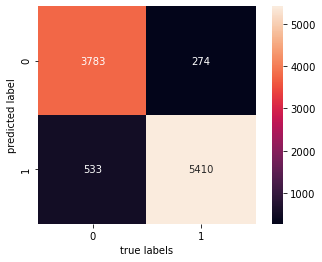

In [26]:
mat = confusion_matrix(data_dev["sentiment"], preds)
sns.heatmap(mat.T, square = True, annot=True, fmt = "d",)
plt.xlabel("true labels")
plt.ylabel("predicted label")
plt.show()

In [16]:
df_test = json_to_df("data\\music_reviews_test_masked.json")

In [17]:
df_test = df_test.replace(np.nan, '', regex=True)

In [18]:
df_test["summary"] = df_test.reviewText + " " + df_test.summary

In [19]:
data_test = df_test[["summary","sentiment"]]

In [20]:
preds_test = pipeline.predict(data_test["summary"])

In [21]:
df_test

,verified,reviewTime,reviewerID,asin,reviewText,summary,unixReviewTime,sentiment,id,style.Format:,vote,image
0,True,"10 24, 2017",A2HAJB8L9NVYTZ,B007Y1AMHE,ok,ok ok,1508803200,_,0,,,
1,True,"04 8, 2015",AD78RH9JWBDEU,B007Y1AMHE,Its awesome,Its awesome love it,1428451200,_,1,,,
2,True,"03 3, 2015",A5UNQFT0JQ8B,B007Y1AMHE,"great, really good!","great, really good! Five Stars",1425340800,_,2,,,
3,True,"05 31, 2014",A1NPTQTAYO51XW,B007Y1AMHE,"THANK THEE LORD FOR THIS YOUNG MAN WISDOM, I P...","THANK THEE LORD FOR THIS YOUNG MAN WISDOM, I P...",1401494400,_,3,,,
4,True,"01 21, 2013",AZ7ON5N7DLC6Y,B007Y1BQ9M,Andy Gibson has a good Texas music sound that ...,Andy Gibson has a good Texas music sound that ...,1358726400,_,4,MP3 Music,,
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,False,"02 4, 2016",A3FY8ZFJFF7NP2,B00CG68C0G,Love this song!!!!,Love this song!!!! Great song!!!,1454544000,_,9995,MP3 Music,,
9996,False,"01 10, 2015",A2APTRQDU48IPH,B00CG68C0G,Very nice song.,Very nice song. Five Stars,1420848000,_,9996,MP3 Music,,
9997,False,"07 1, 2014",A29XWXJ525HH7O,B00CG69F3E,Flunk solidifies their evolution on this album...,Flunk solidifies their evolution on this album...,1404172800,_,9997,MP3 Music,3,
9998,True,"05 29, 2017",A1QJ6G5B7VRAYP,B00CG68G7K,it's a good getting over you song,it's a good getting over you song Five Stars,1496016000,_,9998,MP3 Music,,


In [22]:
from sklearn.metrics import confusion_matrix

In [23]:
confusion_matrix(preds,data_dev["sentiment"])

array([[3783,  274],
       [ 533, 5410]], dtype=int64)

In [24]:
pd.DataFrame(preds_test).to_csv("submission.csv")